## <a id='toc1_1_'></a>[__Пример работы с классом `Process`__](#toc0_)

**Содержание**<a id='toc0_'></a>
- [__Пример работы с классом `Process`__](#toc1_1_)
    - [__Постановка задачи__](#toc1_1_1_)
    - [__Инициализация объекта класса `Process`__](#toc1_1_2_)
    - [__Работа с одиночным процессом__](#toc1_1_3_)
    - [__Работа с произвольным количеством процессов__](#toc1_1_4_)
    - [__Практический смысл__](#toc1_1_5_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

***
### <a id='toc1_1_1_'></a>[__Постановка задачи__](#toc0_)

* Имея данные об общем числе испытаний и числе испытаний, завершившихся неудачей, оценить процесс по методике "Шесть сигм":
    * определить класс процесса (_красный_, _желтый_, _зеленый_);
    * рассчитать сигму $\sigma$ процесса;
    * рассчитать и визуализировать долю брака.

* Требование единообразия интерфейса: для удобства пользователя предусмотреть возможность работать с произвольным количеством процессов как с одним.

***
### <a id='toc1_1_2_'></a>[__Инициализация объекта класса `Process`__](#toc0_)

Параметры:

* `actions` — общее число испытаний. `int | list | numpy.ndarray | pandas.Series`.

* `fails` — число испытаний, завершившихся неудачей. `int | list | numpy.ndarray | pandas.Series`.

* `name` — имя процесса. `str | list | numpy.ndarray | pandas.Series | None`. По умолчанию `None`.

***
### <a id='toc1_1_3_'></a>[__Работа с одиночным процессом__](#toc0_)

In [1]:
from sberpunk.stats import Process
process = Process(fails=59, actions=500, name='A05. A very important process')
process.sigma

array([2.68504413])

In [2]:
process.sigma.item()

2.68504412790781

In [3]:
process.label

array(['YELLOW'], dtype='<U6')

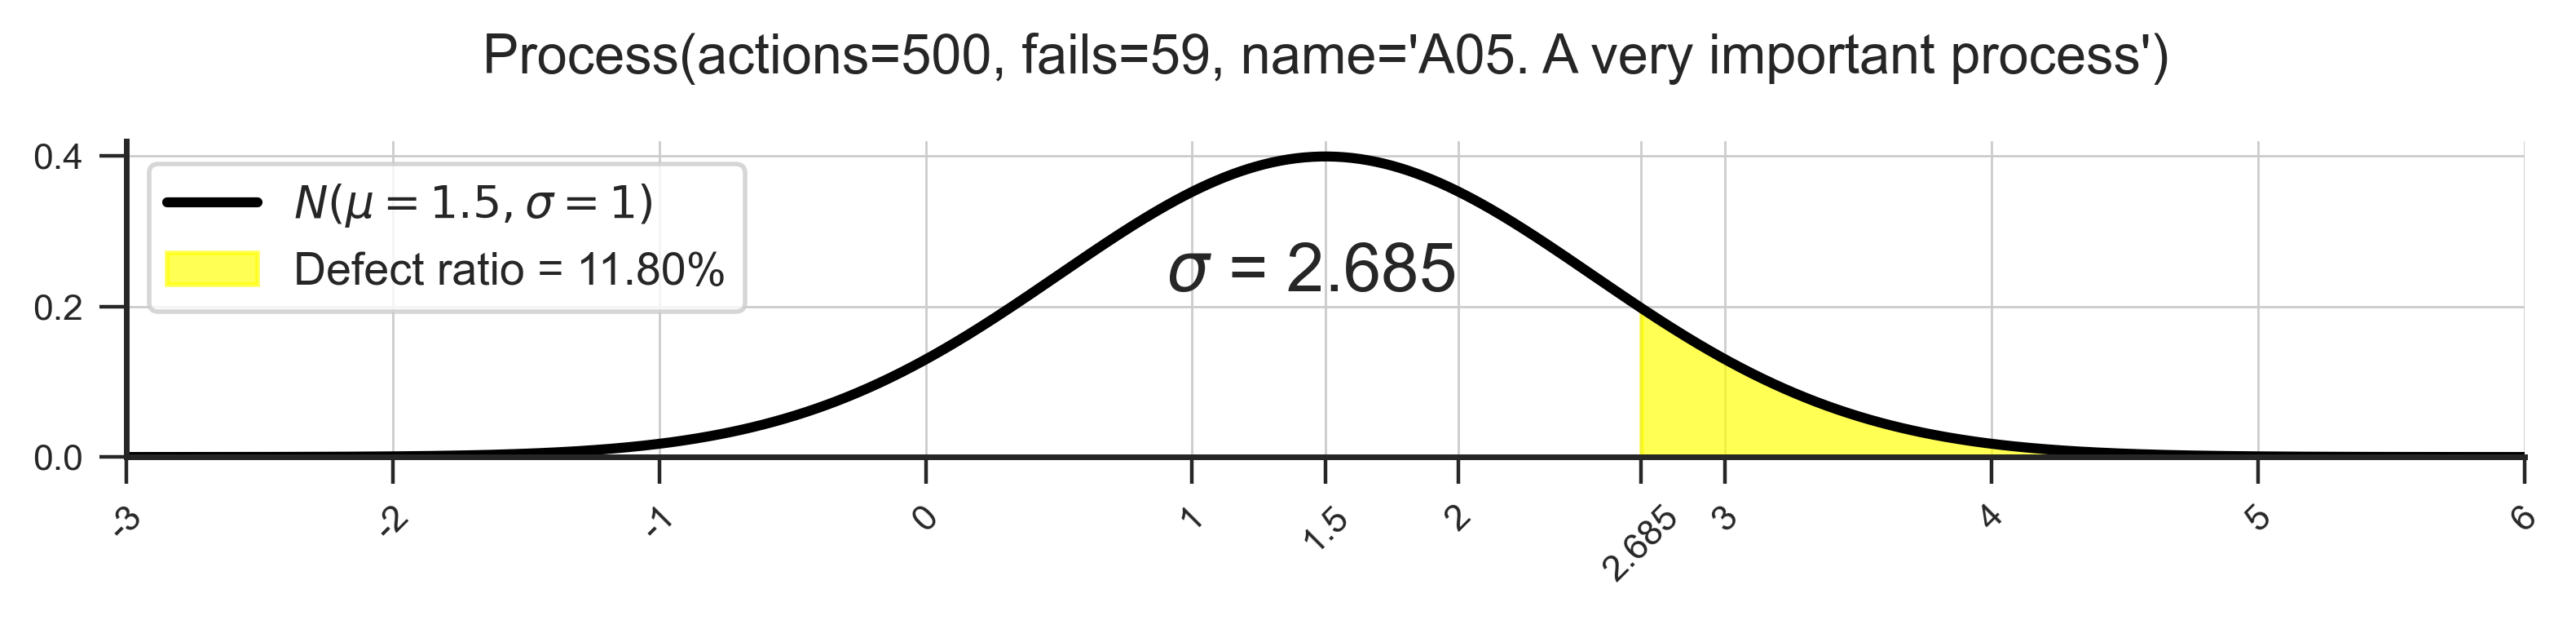

In [4]:
process.plot()

***
### <a id='toc1_1_4_'></a>[__Работа с произвольным количеством процессов__](#toc0_)

Для демонстрации синтезируем данные:

In [5]:
import string
import numpy as np
import pandas as pd

rng = np.random.default_rng(seed=2128506)
total = rng.integers(low=1, high=10**4, size=(10,))

df = pd.DataFrame({
    'ok': total - 200,
    'nok': [200] * 10,
    'total': total,
    'process_name': list(string.ascii_letters[:10])
})

df

,ok,nok,total,process_name
0,1372,200,1572,a
1,3729,200,3929,b
2,6789,200,6989,c
3,5619,200,5819,d
4,7205,200,7405,e
5,443,200,643,f
6,1319,200,1519,g
7,60,200,260,h
8,3903,200,4103,i
9,7345,200,7545,j


In [6]:
bulk = Process(df.total, df.nok, df.process_name)
df['sigma'] = bulk.sigma
df['label'] = bulk.label
df

,ok,nok,total,process_name,sigma,label
0,1372,200,1572,a,2.639600,YELLOW
1,3729,200,3929,b,3.136155,YELLOW
2,6789,200,6989,c,3.401529,YELLOW
3,5619,200,5819,d,3.320123,YELLOW
4,7205,200,7405,e,3.426696,YELLOW
5,443,200,643,f,1.992899,RED
6,1319,200,1519,g,2.618552,YELLOW
7,60,200,260,h,0.763684,RED
8,3903,200,4103,i,3.157148,YELLOW
9,7345,200,7545,j,3.434797,YELLOW


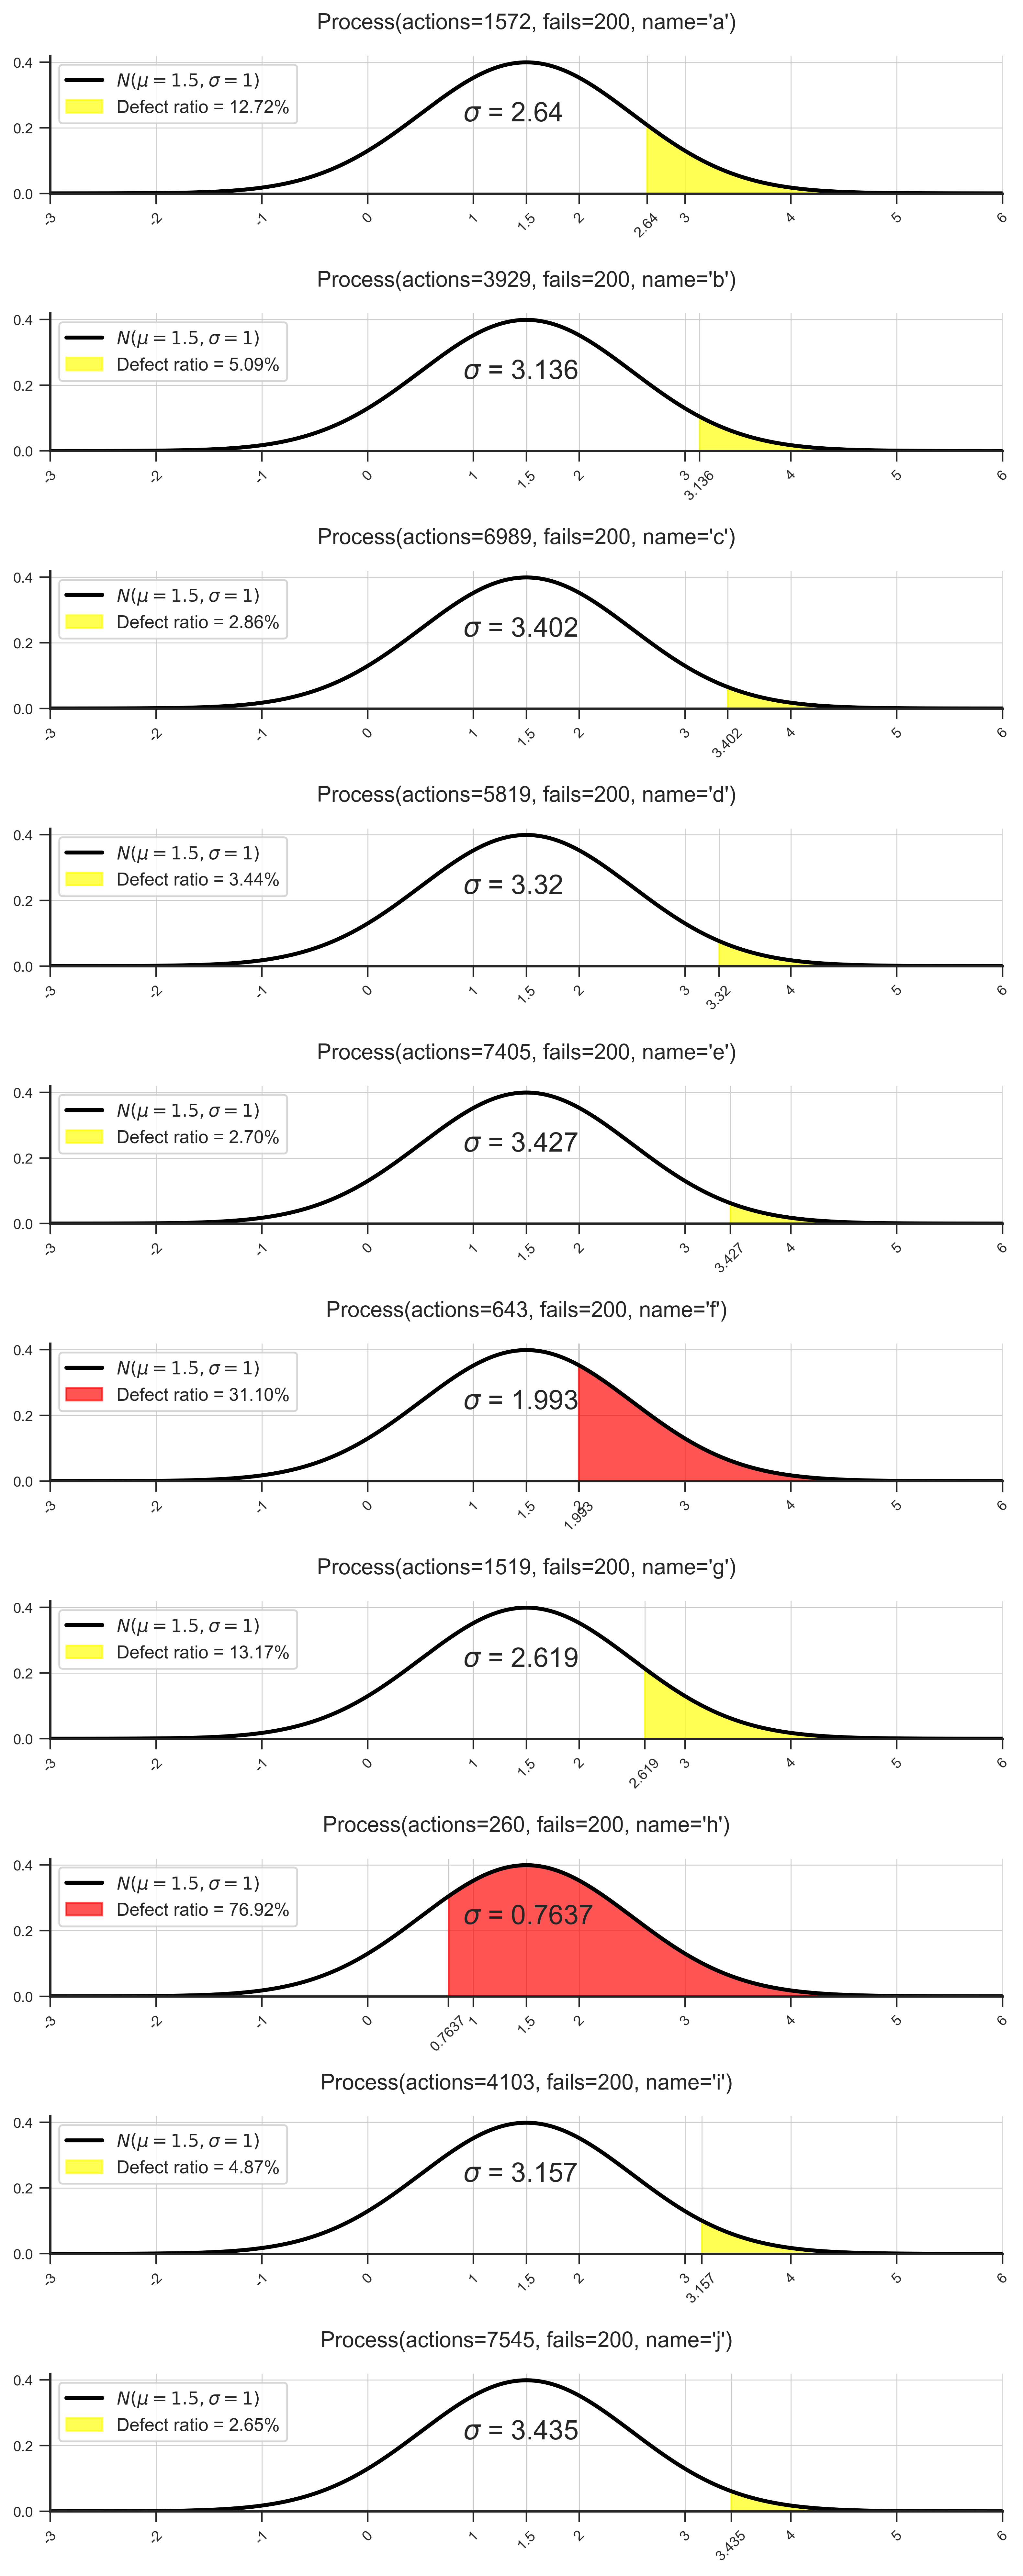

In [7]:
bulk.plot()

***
### <a id='toc1_1_5_'></a>[__Практический смысл__](#toc0_)

In [8]:
from scipy.stats import norm
from sberpunk.stats import Threshold

In [9]:
ratios = [1 - norm(1.5).cdf(thres.value) for thres in Threshold]
ratios

[0.27425311775007355, 0.004661188023718732]

* дефектов более 274253 на 1 млн действий: класс бездефектности `RED`;
* от 4662 до 274253: `YELLOW`;
* менее 4662: `GREEN`.

In [10]:
Process(10**6, 274254).label

array(['RED'], dtype='<U3')

In [11]:
Process(10**6, 274253).label

array(['YELLOW'], dtype='<U6')

In [12]:
Process(10**6, 4662).label

array(['YELLOW'], dtype='<U6')

In [13]:
Process(10**6, 4661).label.item()

'GREEN'